In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from multiprocessing import Queue, Array

from lpde.estimator.datatypes import SmootherParams
from lpde.estimator.parallel.smoother import Smoother
from lpde.utility.controllers import SmootherController

%matplotlib notebook

In [2]:
initial = np.zeros(5)
initial[0] = 1

actual = initial.copy()

control = Queue()
coefficients = Queue()
smoothed = Array('d', initial)
decay = 1.0

params = SmootherParams(control, coefficients, smoothed, decay)
smoother = Smoother(params)
controller = SmootherController(smoother, params)

In [3]:
smoother.start()

<IPython.core.display.Javascript object>


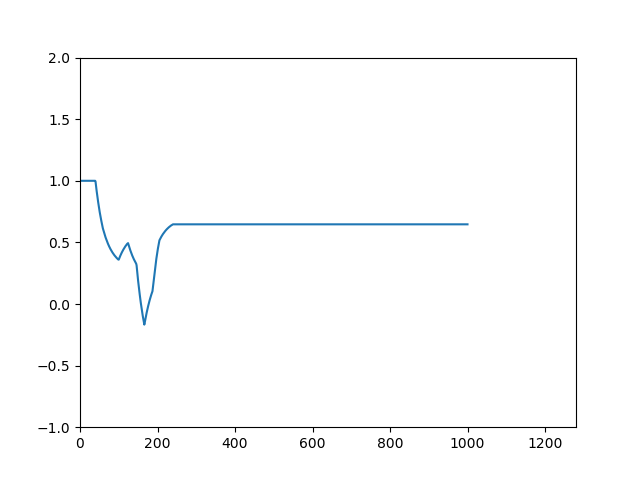

In [4]:
def data_gen():
    counter = 0
    time = 0
    while counter < 1000:
        counter += 1
        time += 1
        yield time, smoothed.get_obj()[0]


def init():
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 10)
    return line,

def run(data):
    # update the data
    time, smooth = data
    time_data.append(time)
    smooth_data.append(smooth)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    if time >= x_max:
        ax.set_xlim(x_min, 2*x_max)
        ax.figure.canvas.draw()
        
    if smooth >= y_max:
        ax.set_ylim(y_min, 2*y_max)
        ax.figure.canvas.draw()
    
    if smooth <= y_min:
        ax.set_ylim(2*y_min, y_max)
        ax.figure.canvas.draw()
        
    line.set_data(time_data, smooth_data)

    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [])
time_data, smooth_data = [], []

animation = FuncAnimation(fig, run, data_gen, blit=False, interval=100, repeat=False, init_func=init)
plt.show()

In [12]:
actual += np.random.uniform(low=-1, high=1)*np.ones_like(initial)
print(actual[0])
coefficients.put(actual)

0.699457835179


In [13]:
controller.stop()